## 문제: Matrix Inverse Method 회귀모델

데이터가 다음과 같이 주어졌을 때:
* x [1,2],[1,4],[1,6]
* y 3,6,7

회귀식을 도출해보자.
* 1) matrix inverse method로 $\hat{w}$을 계산,
* 2) 예측과 실제의 오류 합계를 계산,
* 3) 입력 데이터와 회귀선의 그래프를 작성한다.

## 0) Data

In [66]:
import numpy as np
x=np.array([2,4,6])
y=np.array([3,6,7])

x1=np.array([np.ones(len(x)),x])
x1=x1.T

print(x)
print(x1)
print(y)

[2 4 6]
[[1. 2.]
 [1. 4.]
 [1. 6.]]
[3 6 7]


##  1) matrix inverse method로  𝑤̂  을 계산

$\hat{w} = (X^T X) ^{-1} X^T y$
#### 1. $X^T X$ 계산 

In [67]:
f"x1 shape: {x1.shape} xT shape:{x1.T.shape}"

'x1 shape: (3, 2) xT shape:(2, 3)'

In [69]:
xTx=np.dot(x1.T,x1)
print("xTx=",xTx)

xTx= [[ 3. 12.]
 [12. 56.]]


#### 2. $(X^T X) ^{-1}$ 계산

In [70]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

xTxI= [[ 2.33333333 -0.5       ]
 [-0.5         0.125     ]]


#### 3. $X^T y$ 계산

In [72]:
xTyT=np.dot(x1.T,y)
print("xTyT=",xTyT)

xTyT= [16. 72.]


#### 4. 전체 $(X^T X) ^{-1} X^T y$ 계산
### $\hat{w} = (X^T X) ^{-1} X^T y$

In [73]:
print("weights=",np.dot(xTxI,xTyT))

weights= [1.33333333 1.        ]


## 2) 예측과 실제의 오류 합계를 계산

In [103]:
w0, w1=np.dot(np.linalg.inv(xTx), xTyT) #w0이 앞(상수항 1이 앞에있음)
print(w0, w1)
yhat=w0+w1*x

1.3333333333333286 1.0


In [104]:
print(yhat)

[3.33333333 5.33333333 7.33333333]


In [99]:
print(y)

[3 6 7]


In [100]:
yhat-y

array([ 0.33333333, -0.66666667,  0.33333333])

In [107]:
f"오류 합계: {np.sum(np.power(yhat-y,2))}"

'오류 합계: 0.6666666666666666'

## 3) 입력 데이터와 회귀선의 그래프를 작성

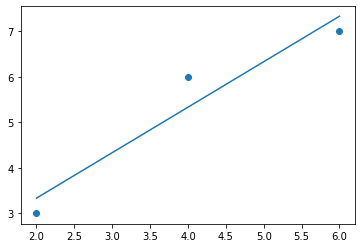

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)